In [1]:
%pylab inline
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4, ErrorCode, Variable
import cartopy
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import math as math
import sys
sys.path.insert(1, '/home/sypmauu/GalapagosProject/scripts/functions')
from ParticlePlotFunctions import *
import matplotlib.animation as animation
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load bathymetry and land mask, land=0, ocean=1

bathy_file = '/home/sypmauu/GalapagosProject/data/MIT4km/RGEMS3_Surf_grid.nc'
dfile = Dataset(bathy_file)
bathy = dfile.variables['Depth'][:]
lat = dfile.variables['YG'][:]
lon = dfile.variables['XG'][:]

landmask = bathy[:]
landmask = np.where(landmask<1, 0, landmask)
landmask = np.where(landmask>=1, 1, landmask)
bathy = np.where(bathy<1, nan, bathy)


In [3]:
# load particle data
namefile = '../../data_output/galapagosparticles_bwd_4km_2008_website.nc'
Traj = ReadTrajectories(namefile)


In [4]:
psel=(10,22,42,135,150,165,178,184,185,193,206,212,220,221,240,254,268,292,315,320,343,344,347,370)


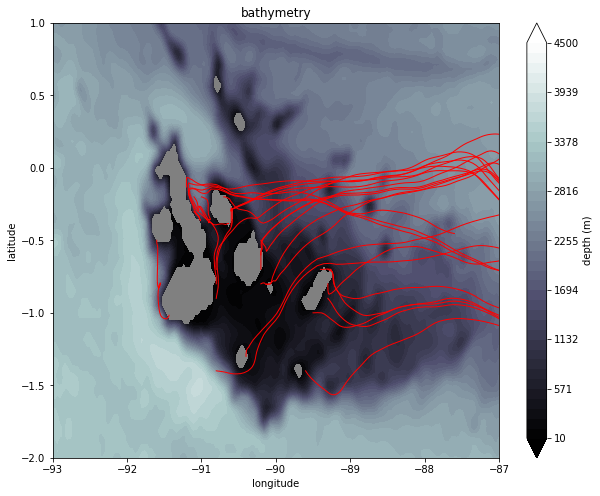

In [5]:
#quick check output

map_extent = [-93,-87,-2,1]
figsize=(10,8)
plat = Traj['lat'][psel,0:100]
plon = Traj['lon'][psel,0:100]
ptime = Traj['time'][psel,0:100]
PlotBathyTraj(plon,plat,lon,lat,bathy,figsize,map_extent)

In [14]:
mat1 = np.matrix(plon.T)
with open('longitudes.txt','wb') as f:
    for line1 in mat1:
        np.savetxt(f, line1, fmt='%.3f')
        
mat2 = np.round(plat,3)
mat2 = np.matrix(mat2.T)
with open('latitudes.txt','wb') as f:
    for line2 in mat2:
        np.savetxt(f, line2, fmt='%.3f')

mat3 = np.matrix(ptime.T)        
with open('times.txt','wb') as f:
    for line3 in mat3:
        np.savetxt(f, line3, fmt='%s')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


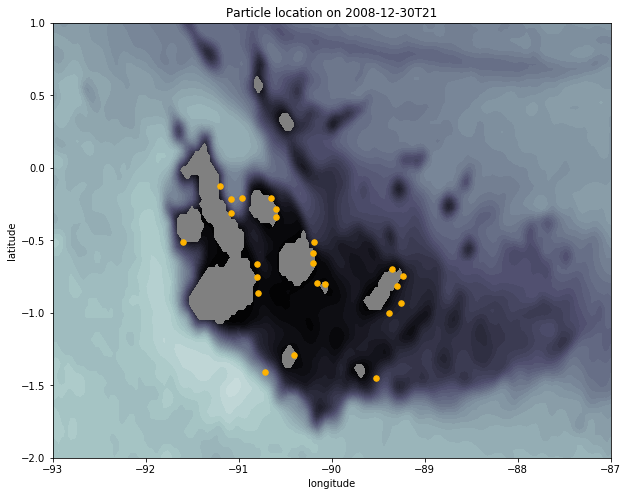

In [15]:
# Make a movie (works for both forward and backward)

map_extent = [-93,-87,-2,1]
pylab.rcParams['figure.figsize'] = (10, 8)
Zmin = 10
Zmax = 4500

psel=(10,22,42,135,150,165,178,184,185,193,206,212,220,221,240,254,268,292,315,320,343,344,347,370)

plat = Traj['lat'][psel,0:100]
plon = Traj['lon'][psel,0:100]
ptime= Traj['time'][psel,0:100]
plottimes = np.arange(np.min(ptime), np.max(ptime), dtype='datetime64[D/8]')

fig, ax = plt.subplots(1,1)

levels = np.linspace(Zmin, Zmax, 41)
fig1 = ax.contourf(lon,lat,bathy,       
                      levels = levels,    
                      cmap='bone',       
                      extend='both',      
                      origin='lower')              
ax.set_xlabel('longitude')                 
ax.set_ylabel('latitude') 
ax.set_xlim(map_extent[0:2])
ax.set_ylim(map_extent[2:4])
ax.set_facecolor('gray')

t=0
b = np.where(np.logical_and(ptime >= plottimes[t], ptime < plottimes[t+1]))
scat = ax.scatter(plon[b], plat[b], s=30, c=(1,0.7,0))
ttl = ax.set_title('Particle location on ' + str(plottimes[0]))
frames = np.arange(0, len(plottimes)-1)

def animate(t):
    b = np.where(np.logical_and(ptime >= plottimes[t], ptime < plottimes[t+1]))
    scat.set_offsets(np.vstack((plon[b], plat[b])).transpose())
    particle_color = (1,0.7,0)
    scat.set_color(particle_color)
    ttl.set_text('Particle location on ' + str(plottimes[t]))
    return scat,

ax.set_xlim(map_extent[0:2])
ax.set_ylim(map_extent[2:4])

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=100, blit=True)
anim

anim.save('galapagosparticles_website.gif', writer='imagemagick', fps=10)